In [1]:
import os
import glob
import matplotlib.pyplot as plt

import pickle
import pandas as pd

In [2]:
import pandas as pd

df = pd.read_csv("../../data/somalia_combined_df.csv")
df.set_index('date', inplace=True)
df.index = pd.to_datetime(df.index)


In [4]:
df

,jb001_flow,jb002_flow,jb009_flow,snfra_flow,jb001_level,jb002_level,jb009_level,snfra_level
date,,,,,,,,
2023-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-21,NaN,NaN,156.681837,NaN,2.06,NaN,2.44,4.8
2023-12-20,NaN,NaN,163.684843,NaN,2.02,NaN,2.48,4.8
2023-12-19,NaN,NaN,167.239613,NaN,2.54,NaN,2.50,4.8
2023-12-18,NaN,NaN,163.684843,NaN,2.10,NaN,2.48,4.8
...,...,...,...,...,...,...,...,...
1951-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
def plot_flow_and_level(df):

    marker_size = 3

    fig, axes = plt.subplots(2, 1)

    # Plot flow data
    axes[0].scatter(df.index, df["jb001_flow"], label="jb001_flow_data", s = marker_size)
    axes[0].scatter(df.index, df["jb002_flow"], label="jb002_flow_data", s = marker_size)
    axes[0].scatter(df.index, df["jb009_flow"], label="jb009_flow_data", s = marker_size)
    axes[0].scatter(df.index, df["snfra_flow"], label="snrfa_flow_data", s = marker_size)

    axes[0].set_xlabel("Date")
    axes[0].set_ylabel("Flow (m3/s)")
    axes[0].legend()

    # Plot water level data
    axes[1].scatter(df.index, df["jb001_level"], label="jb001_water_level", s = marker_size)
    axes[1].scatter(df.index, df["jb002_level"], label="jb002_water_level", s = marker_size)
    axes[1].scatter(df.index, df["jb009_level"], label="jb009_level_data", s = marker_size)
    axes[1].scatter(df.index, df["snfra_level"], label="snrfa_level_data", s = marker_size)
    axes[1].set_xlabel("Date")
    axes[1].set_ylabel("Water Level (m)")
    axes[1].legend()

    plt.tight_layout()
    plt.show()

# Resample to daily, monthly and yearly frequencies

In [19]:

df_daily_resample = df.resample('D').mean()
df_monthly_resample = df.resample('M').mean()
df_yearly_resample = df.resample('Y').mean()

/tmp/ipykernel_863294/3862204084.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly_resample = df.resample('M').mean()
/tmp/ipykernel_863294/3862204084.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly_resample = df.resample('Y').mean()


In [20]:
df

,jb001_flow,jb002_flow,jb009_flow,snfra_flow,jb001_level,jb002_level,jb009_level,snfra_level
date,,,,,,,,
2023-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-21,NaN,NaN,156.681837,NaN,2.06,NaN,2.44,4.8
2023-12-20,NaN,NaN,163.684843,NaN,2.02,NaN,2.48,4.8
2023-12-19,NaN,NaN,167.239613,NaN,2.54,NaN,2.50,4.8
2023-12-18,NaN,NaN,163.684843,NaN,2.10,NaN,2.48,4.8
...,...,...,...,...,...,...,...,...
1951-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


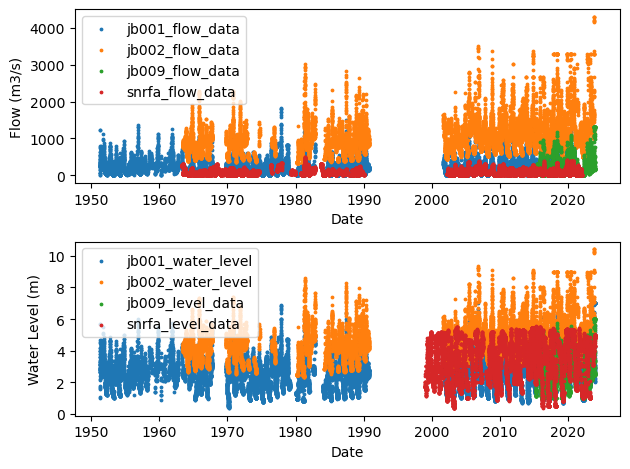

In [21]:
plot_flow_and_level(df)

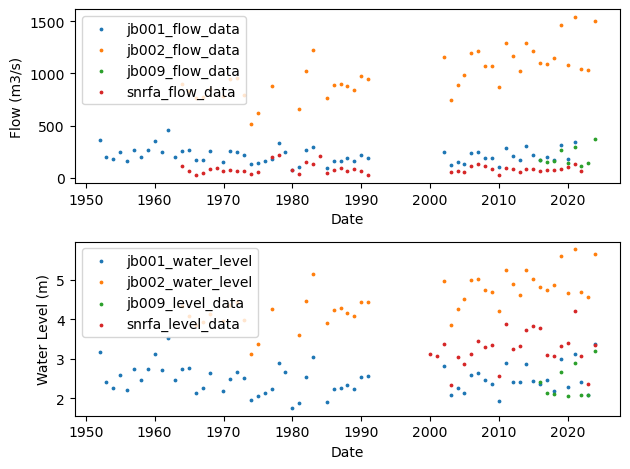

In [22]:
plot_flow_and_level(df_yearly_resample)

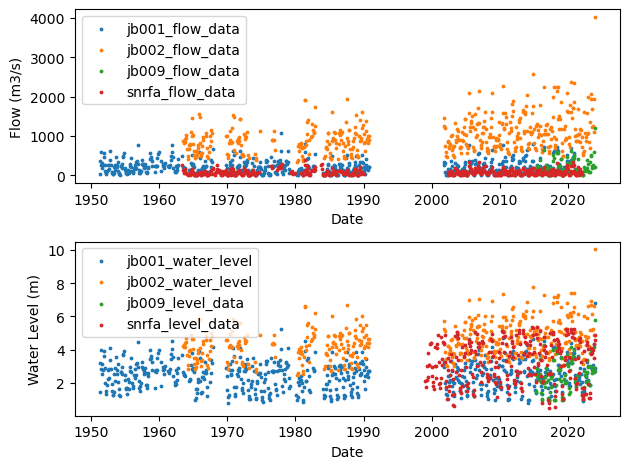

In [23]:
plot_flow_and_level(df_monthly_resample)

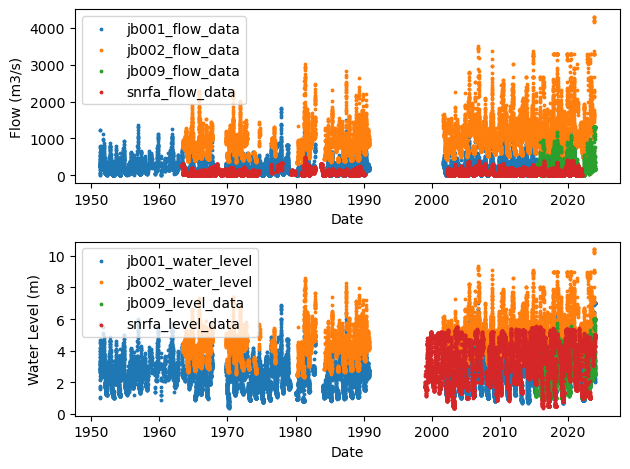

In [24]:
plot_flow_and_level(df_daily_resample)

# Group by days and months

In [36]:
df['day_of_year'] = df.index.dayofyear
df_daily_mean = df.groupby('day_of_year').mean()

df['month'] = df.index.month
df_monthly_mean = df.groupby('month').mean()

df['year'] = df.index.year
df_yearly_mean = df.groupby('year').mean()

In [37]:
df_daily_mean

,jb001_flow,jb002_flow,jb009_flow,snfra_flow,jb001_level,jb002_level,jb009_level,snfra_level,month
day_of_year,,,,,,,,,
1,81.158874,760.428611,61.492065,29.592218,1.844216,3.920588,1.707500,2.298000,1.0
2,77.854082,759.320633,59.633300,29.117005,1.825229,3.917235,1.690000,2.284800,1.0
3,75.462365,761.359078,63.060257,28.951079,1.810425,3.921588,1.707500,2.242800,1.0
4,71.829143,751.026066,54.884868,28.585427,1.781433,3.890853,1.642500,2.230400,1.0
5,70.485252,745.054427,51.320809,28.287328,1.769367,3.873588,1.610000,2.225200,1.0
...,...,...,...,...,...,...,...,...,...
362,88.356373,760.103447,75.713233,32.384528,1.891879,3.912029,1.808571,2.525455,12.0
363,87.234907,756.964036,73.170347,31.388892,1.883404,3.903750,1.788571,2.506818,12.0
364,81.530749,753.718043,68.326360,31.021372,1.855106,3.891944,1.757143,2.469545,12.0


In [38]:
df_monthly_mean

,jb001_flow,jb002_flow,jb009_flow,snfra_flow,jb001_level,jb002_level,jb009_level,snfra_level,day_of_year
month,,,,,,,,,
1,51.288322,690.843002,37.226455,20.755937,1.602936,3.708523,1.437661,2.103097,16.000000
2,30.068713,598.816679,21.862606,14.621954,1.357282,3.415719,1.247321,1.748094,45.620874
3,42.754068,620.619989,68.377671,26.186253,1.395066,3.438877,1.529170,1.719873,75.252874
4,170.032541,924.817749,200.584401,70.463480,2.201351,4.255428,2.306667,2.863297,105.746575
5,302.095559,1324.407393,382.347195,150.170112,2.954726,5.293242,3.275960,4.382109,136.246575
6,193.626409,1078.413032,246.223897,82.614710,2.503357,4.749798,2.775083,3.513936,166.746575
7,183.927398,957.308551,153.293945,45.532630,2.481273,4.482486,2.337459,2.972680,197.228319
8,253.182950,1065.555239,192.744464,90.956083,2.808777,4.763514,2.572340,3.995738,228.244563
9,282.895910,1156.435736,212.471064,139.343069,2.931063,4.979492,2.654148,4.365546,258.746789


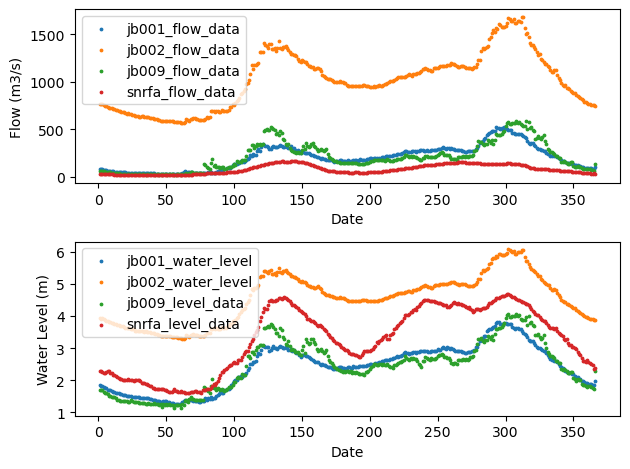

In [39]:
plot_flow_and_level(df_daily_mean)

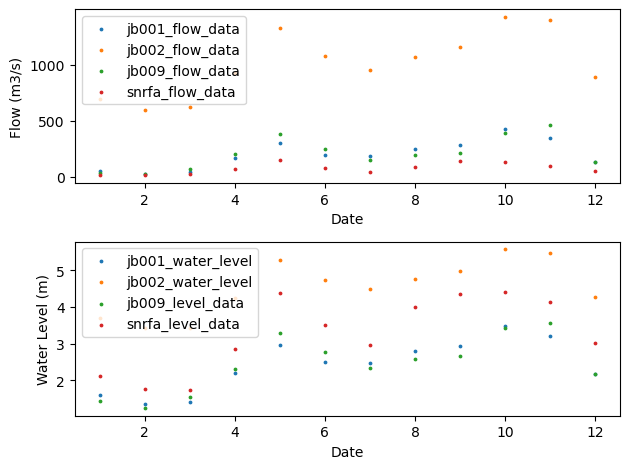

In [40]:
plot_flow_and_level(df_monthly_mean)

In [41]:
df_yearly_mean

,jb001_flow,jb002_flow,jb009_flow,snfra_flow,jb001_level,jb002_level,jb009_level,snfra_level,day_of_year,month
year,,,,,,,,,,
1951,359.424490,NaN,NaN,NaN,3.174516,NaN,NaN,NaN,183.000000,6.526027
1952,201.242388,NaN,NaN,NaN,2.404792,NaN,NaN,NaN,183.500000,6.513661
1953,175.687200,NaN,NaN,NaN,2.263892,NaN,NaN,NaN,183.000000,6.526027
1954,244.678642,NaN,NaN,NaN,2.589448,NaN,NaN,NaN,183.000000,6.526027
1955,157.894054,NaN,NaN,NaN,2.214260,NaN,NaN,NaN,183.000000,6.526027
...,...,...,...,...,...,...,...,...,...,...
2019,176.199815,1082.981300,143.344848,101.915421,2.279808,4.681562,2.075096,3.395659,183.000000,6.526027
2020,341.413479,1540.762653,296.137937,128.952417,3.136940,5.773770,2.907158,4.207240,183.500000,6.513661
2021,NaN,1045.966622,108.609140,68.711615,2.405237,4.704777,2.087805,3.083677,180.000000,6.434540


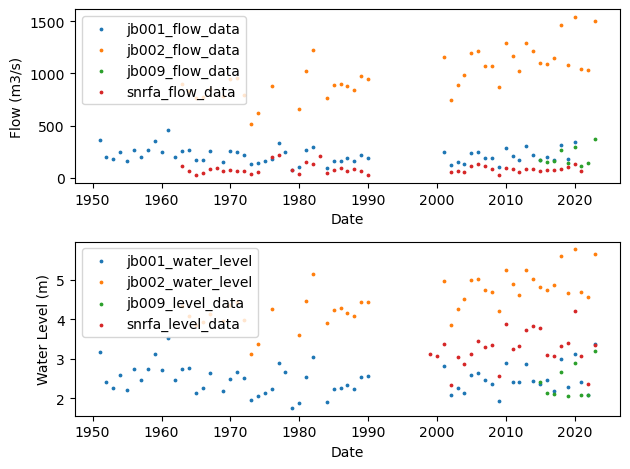

In [42]:
plot_flow_and_level(df_yearly_mean)